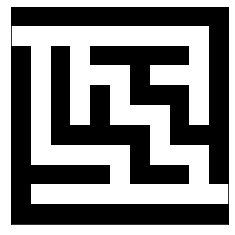

In [24]:
from pile import Pile,creer_pile

N=5 # dimension longueur et largeur

# tableau NxN des positions non visitées
T=[[True]*N for _ in range(N)]

entree = (0,0) # position de l'entrée
sortie = (N-1,N-1) # position de la sortie

from random import shuffle # permet le mélange d'une liste

def voisins(pos):
    """ Renvoie les positions voisines de pos non encore visitées"""
    i,j=pos
    liste=[]
    for dx in (-1,1):
        if 0<=i+dx<N and T[i+dx][j]:
            liste.append((i+dx,j))
        if 0<=j+dx<N and T[i][j+dx]:
            liste.append((i,j+dx))
    shuffle(liste)
    return liste

nbreVisites = 0 # compteur de cases visitées

def interdire(pos): # interdit la visite d'une position
    global nbreVisites
    nbreVisites+=1
    i,j=pos # i = pos[0] et j = pos[1]
    T[i][j] = False
    
def positionNonVisitee(): # Encore une position à visiter ?
    return nbreVisites < N**2

def parcours():
    """
    On construit le parcourt du labyrinthe avec sa solution entre entrée et sortie
    dans un carré de NxN cases
    """
    position=entree
    filDariane = creer_pile()
    filDariane.empiler(position)
    visites=[position] # mémoire des positions visitées
    while positionNonVisitee():
        voisinage = voisins(position)
        if voisinage == []: # retour arrière
            filDariane.depiler()
            position=filDariane.peek()
            visites.append(position)
        else:
            position = voisinage[0] # avancement
            filDariane.empiler(position)
            visites.append(position)
            interdire(position)
    return visites

def labyrinthe():
    Laby=[[0]*(2*N+1) for _ in range(2*N+1)]
    visites=parcours()
    i0,j0=visites[0]
    for k in range(1,len(visites)):
        i1,j1 = visites[k]
        Laby[2*i0+1][2*j0+1]=1 # percement du mur
        Laby[2*i1+1][2*j1+1]=1
        Laby[i0+i1+1][j0+j1+1]=1
        i0,j0 = i1,j1
    #entrée et sortie
    Laby[2*entree[0]+1][0] = Laby[2*sortie[0]+1][2*N] = 1
    return Laby

Labyrinthe = labyrinthe()
import matplotlib
import matplotlib.pyplot as plt
plt.imshow(Labyrinthe,interpolation='nearest',cmap=matplotlib.cm.gray)
plt.xticks([])
plt.yticks([])
plt.show()